## Estadística Aplicada
Sesión 7 - 5 septiembre

Joel Fayam Rivera Peña 2076323

Grupo 42

## Librerías y datos

In [1]:
## Librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
## Librerías especializadas
    #Función exponencial de supervivencia
from lifelines import ExponentialFitter


In [6]:
## Importar los datos
recaida=pd.read_csv('https://raw.githubusercontent.com/jimmyzac/Estadistica-Aplicada-FCFM-UANL/main/bases_datos/ejercicio_expo.csv')

In [7]:
recaida

,Paciente,tiempo,estado
0,1,5,1
1,2,8,1
2,3,12,1
3,4,24,1
4,5,32,1
5,6,17,1
6,7,16,0
7,8,17,0
8,9,19,0
9,10,30,0


## Exponencial

In [8]:
exponen=ExponentialFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [10]:
exponen.print_summary()

ImportError: Missing optional dependency 'Jinja2'. DataFrame.style requires jinja2. Use pip or conda to install Jinja2.

<lifelines.ExponentialFitter:"Exponential_estimate", fitted with 10 total observations, 4 right-censored observations>
   number of observations = 10
number of events observed = 6
           log-likelihood = -26.41
               hypothesis = lambda_ != 0

---
          coef   se(coef)   coef lower 95%   coef upper 95%
lambda_  30.00      12.25             6.00            54.00

          cmp to    z    p   -log2(p)
lambda_     0.00 2.45 0.01       6.13
---
AIC = 54.81

In [11]:
#a) Tasa de riesgo

exponen.hazard_

,Exponential_estimate
5.0,0.033333
8.0,0.033333
11.0,0.033333
14.0,0.033333
17.0,0.033333
20.0,0.033333
23.0,0.033333
26.0,0.033333
29.0,0.033333
32.0,0.033333


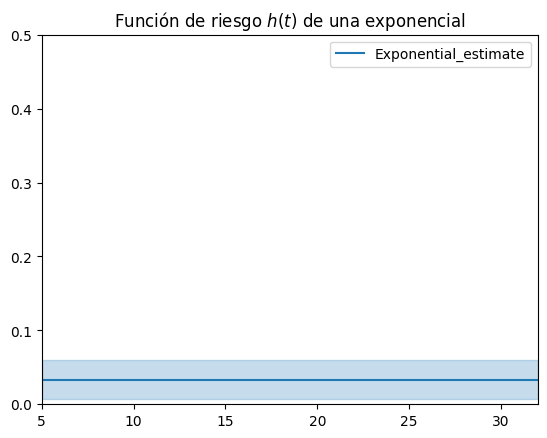

In [17]:
# graficar h(t)
exponen.plot_hazard()
plt.title('Función de riesgo $h(t)$ de una exponencial')
plt.xlim(5,32)
plt.ylim(0,0.5)
plt.show()

In [18]:
# b) Prob no recaer en 16 meses S(16)
exponen.survival_function_at_times(16)

16    0.586646
Name: Exponential_estimate, dtype: float64

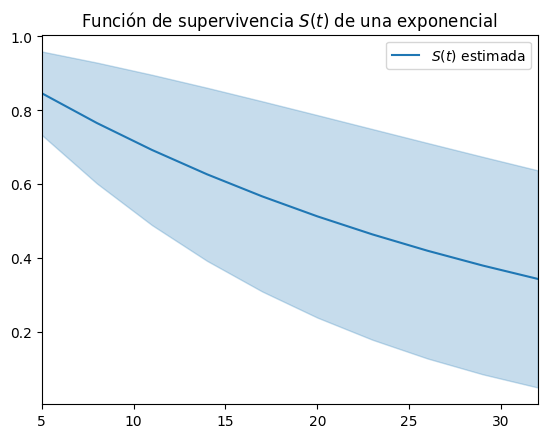

In [20]:
exponen.plot_survival_function(label='$S(t)$ estimada')
plt.title('Función de supervivencia $S(t)$ de una exponencial')
plt.xlim(5,32)
plt.show()

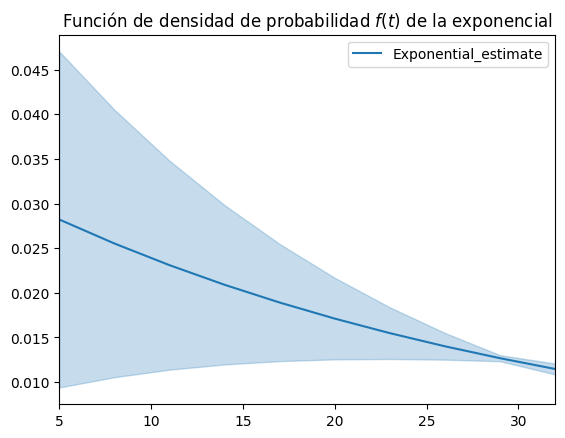

In [21]:
## f(t) funcion de densidad de probabilidad
exponen.plot_density()
plt.title('Función de densidad de probabilidad $f(t)$ de la exponencial')
plt.xlim(5,32)
plt.show()

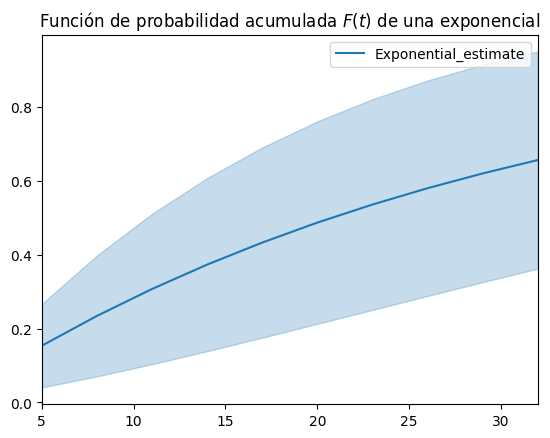

In [22]:
## F(t)
exponen.plot_cumulative_density()
plt.title('Función de probabilidad acumulada $F(t)$ de una exponencial')
plt.xlim(5,32)
plt.show()

## Weibull

Vamos a suponer que el tiempo de supervivencia de los datos se distribuyen como una Weibull

In [23]:
from lifelines import WeibullFitter

In [25]:
mweibull=WeibullFitter().fit(recaida[' tiempo'],recaida[' estado'])

In [27]:
# Parámetro Gamma
mweibull.rho_

1.8867259500116444

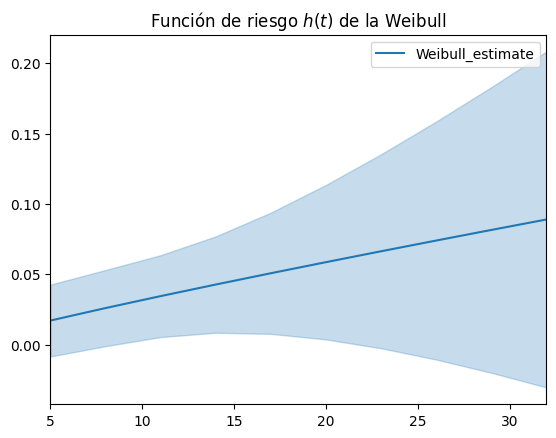

In [29]:
mweibull.plot_hazard()
plt.title('Función de riesgo $h(t)$ de la Weibull')
plt.xlim(5,32)
plt.show()

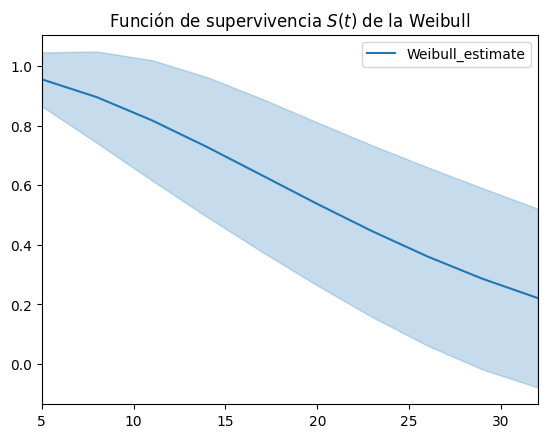

In [31]:
# Función de supervivencia de Weibull
mweibull.plot_survival_function()
plt.title('Función de supervivencia $S(t)$ de la Weibull')
plt.xlim(5,32);

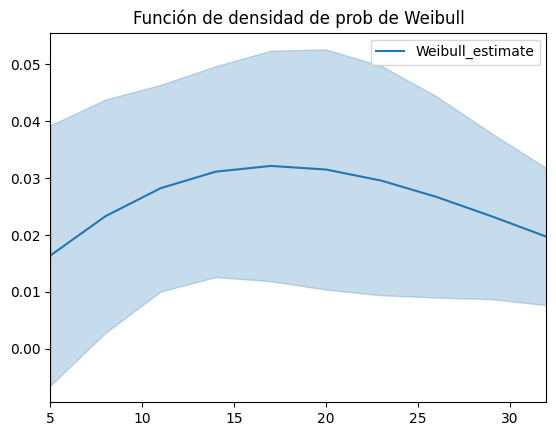

In [32]:
# f(t) Weibull
mweibull.plot_density()
plt.title('Función de densidad de prob de Weibull')
plt.xlim(5,32);


## Log-Normal

Vamos a suponer que el tiempo de supervivencia de los datos se distribuyen como una Log-Normal

In [33]:
from lifelines import LogNormalFitter

In [34]:
mlogn=LogNormalFitter().fit(recaida[' tiempo'],recaida[' estado'])

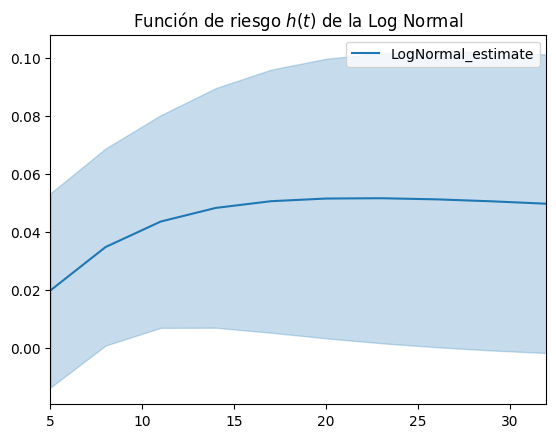

In [38]:
# Gráfico del riesgo
mlogn.plot_hazard()
plt.title('Función de riesgo $h(t)$ de la Log Normal')
plt.xlim(5,32);

In [41]:
mlogn.hazard_

,LogNormal_estimate
5.0,0.019961
8.0,0.034916
11.0,0.043704
14.0,0.048408
17.0,0.050720
20.0,0.051641
23.0,0.051744
26.0,0.051361
29.0,0.050690
32.0,0.049850


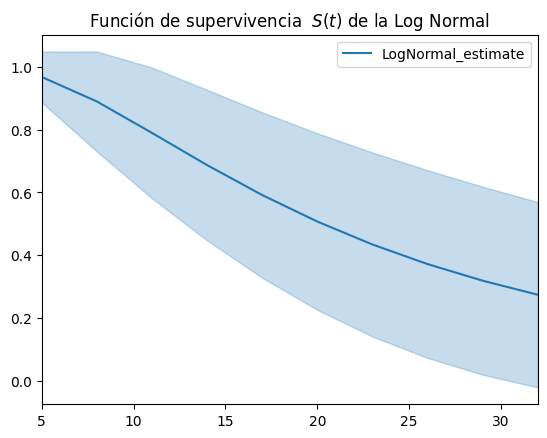

In [40]:
# Gráfico de la supervivencia
mlogn.plot_survival_function()
plt.title('Función de supervivencia  $S(t)$ de la Log Normal')
plt.xlim(5,32);

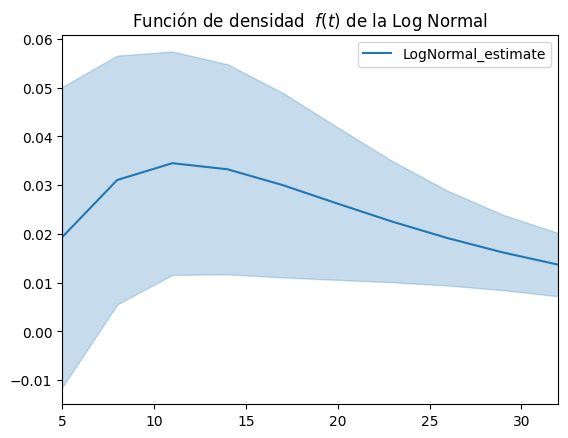

In [42]:
# Gráfico del riesgo
mlogn.plot_density()
plt.title('Función de densidad  $f(t)$ de la Log Normal')
plt.xlim(5,32);

¿ El tiempo de supervivencia de recaída es exponencial, weibull o log-normal?

## ¿Qué modelo es mejor?

El criterio de Akaike (Akaike Information Criteria AIC) sirve para elegir el "mejor" modelo.<br>
           $AIC=-2ln(Verosimilitud)+2k$ 
<br>donde k es el número de parámetros del modelo de regresión. El mejor modelo es el que tiene el mejor valor de AIC. AIC prefiere modelos simples

In [50]:
print('AIC por modelo')
print('Exponencial: ', exponen.AIC_.round(2),', Weibull: ', mweibull.AIC_.round(2),', Log-Normal: ', mlogn.AIC_.round(2))

AIC por modelo
Exponencial:  54.81 , Weibull:  54.16 , Log-Normal:  54.51


De acuerdo con AIC el "mejor" modelo es Weibull, el riesgo de recaída es creciente